https://ppluscht.github.io/DSFinal/

## The Effect of Covid 19 on the Restaurant Industry in New Orleans

Paul Pluscht and Daniel Margulies

## Research Ideas and Plan



For our data science project we plan to focus on the effects of COVID-19 on the restaurant industry in New Orleans. 
We are interested in exploring this as an opportunity to learn what factors make a restaurant more or less 
likely to close during the pandemic. We know New Orleans has been hit hard by the pandemic, especially as a 
city that is very reliant on tourism. We believe our data could provide insight for existing restaurants and those 
looking to open new restaurants. We hope to learn what impact location, mobile delivery, and other factors 
contribute to the resiliency and prosperity of a restaurant. 

The first dataset we will be exploring to answer that question is the business liscence data
for New Orleans found [here](https://data.nola.gov/Economy-and-Workforce/Occupational-Business-Licenses/hjcd-grvu). We are interested in this dataset because it contains over 10.8K businesses in New Orleans. This will be useful for us in a multitude of ways. We can filter the data to only show restaurants and use those to see what new places are opening up (we can see business start date), as well as see information such as address, business type, etc. We know this may not cover anything, and we can use New Orleans yellow pages to help us determine what businesses have opened and closed.  From here, we would like to look at potential factors that may have helped businesses stay afloat and caused other groups of restaurants to go under.

Not only for listing restaurants, that data can prove useful for a question we have: During the pandemic, live event venues and near Air BnB sales were halted or severely slowed. Were restaurants closer to those areas hit harder? 

For example, restaurants that are positioned near bars and are reliant on people in the area drinking may be hit harder than those that rely on families coming to eat. We can see in our dataset the locations of all these places, and can query for businesses by street as an example. 

This is the dataset for short-term rentals is found [here](https://data.nola.gov/Housing-Land-Use-and-Blight/Vacation-Rentals-Hotels-B-B-short-term-rentals-etc/rbhq-zbz9)
We think this dataset can also provide some insight as we can see what areas short-term rentals/hotels are highly concentrated in. With those markets drying up, nearby restaurants will not be experiencing the business they once did and could be in big trouble. This data may be able to give insight on the potential risks/rewards of opening a restaurant near a tourist spot vs. a neighborhood.

This dataset is for live event permits is found [here](https://data.nola.gov/Economy-and-Workforce/Live-Entertainment-Permits/fi6r-tech).
Like short-term rentals, live events drive large amounts of people to certain areas. Restaurants near the saints stadium for example most likely see boosts in customers on game-day. Are they able to survive without those customer surges just as well as other restaurants? 

We suppose all of these questions are also relevant and could expand to include bars as well. They have seen similar patterns in revenue loss as a result of the pandemic, potentially far more so than corporate staples such as a Mcdonalds, Domino’s or Raising Cane’s for example. 

This leads into the next factor we want to consider which is does being on a delivery service such as UberEats or DoorDash make a business more profitable/resilient in a pandemic? Our intuition tells us it would. The UberEats API will allow us to access lists of information about what restaurants are on the app.
[Uber API](https://developer.uber.com/docs/eats/introduction)


## Collaboration Plan

We exchange text messages frequently and will zoom at least bi-weekly to coordinate/delegate tasks and discuss 
further progress. We set up a private github repository for code collaboration and plan on using that to do our work.


## Data

In [1]:
import pandas as pd
import re
import numpy as np
!pip3 install fuzzywuzzy
!pip3 install python-Levenshtein
import fuzzywuzzy
import datetime
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999

pd.set_option('display.max_columns', None)

The code below creates a dataframe from the Occupational Business License Data found [here](https://data.nola.gov/Economy-and-Workforce/Occupational-Business-Licenses/hjcd-grvu) 

In [2]:
active_licenses = pd.read_csv("./Data/licenses.csv", header = None)
active_licenses.columns = active_licenses.loc[0].values.tolist() #Renames the columns
active_licenses.drop(index = 0, inplace = True) #Drops a row containing only title info
active_licenses.head()


,BusinessName,OwnerName,BusinessType,BusinessLicenseNumber,BusinessStartDate,Address,StreetNumber,StreetDirection,StreetName,StreetSuffix,Suite,City,State,Zip,PhoneNumber,MailAddress,MailSuite,MailCity,MailState,MailZip,Latitude,Longitude,Location
1,KINDRED INVESTIGATIONS,KINDRED INVESTIGATIONS INC.,1212 - HOME BASED-OFFICE USE ONLY,242228,02/19/2020,1334 ST ROCH AVE,1334,NaN,ST ROCH,AVE,NaN,NEW ORLEANS,LA,70117,NaN,1334 ST ROCH AVE,NaN,NEW ORLEANS,LA,70117,29.971651206495,-90.0525862225698,"(29.971651206495, -90.0525862225698)"
2,LEGIER & COMPANY APAC,LEGIER & MATERNE APAC,3344 - CERTIFIED PUBLIC ACCOUNTANTS,245139,01/01/1997,1100 POYDRAS ST,1100,NaN,POYDRAS,ST,3450,NEW ORLEANS,LA,70163,5045998388,1100 POYDRAS ST,3450,NEW ORLEANS,LA,70163,29.9499303373249,-90.075483218956,"(29.9499303373249, -90.075483218956)"
3,ASMINISTRATION OFFICE/NEW ORLEANS MISSION,"NEW ORLEANS MISSION, INC","2044 - COMMUNITY HOUSING SVCS, OTH",245161,01/01/2010,1134 BARONNE ST,1134,NaN,BARONNE,ST,NaN,NEW ORLEANS,LA,70113,5045232116,1134 BARONNE ST,NaN,NEW ORLEANS,LA,70113,29.9428477199858,-90.0760425545731,"(29.9428477199858, -90.0760425545731)"
4,TOTAL COMMUNITY ACTION INC,TOTAL COMMUNITY ACTION INC,"1401 - SOCIAL ADVOCACY ORGANIZATIONS, OTHER",242233,07/17/2015,1420 S JEFFERSON DAVIS PKWY,1420,S,JEFFERSON DAVIS,PKWY,NaN,NEW ORLEANS,LA,70125,5043303070,1420 S JEFFERSON DAVIS PKWY,NaN,NEW ORLEANS,LA,70125,29.9559760388089,-90.1050238200641,"(29.9559760388089, -90.1050238200641)"
5,MOBILE MINI INC,MOBILE MINI INC,3330 - CONSTR/MNG/FRSTRY MACH & EQP RNT/LSNG,242318,05/01/1999,9641 GENTILLY RD,9641,NaN,GENTILLY,RD,101,NEW ORLEANS,LA,70127,6028946311,4646 E VAN BUREN ST,STE 400,PHOENIX,AZ,85008,NaN,NaN,NaN


Since we are only interested in restaurants and bars, we need to filter by the following categories: full service restaurants (1105 - FULL SVC RESTAURANTS (TABLE SERVICE)), partial sevice restaurants((2062- LIMITED SVC RESTAURANTS (NO TABLE SERVICE)), and bars (1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)).

In [3]:
active_FS = active_licenses.copy().loc[active_licenses.BusinessType.isin(["1105 - FULL SVC RESTAURANTS (TABLE SERVICE)",
                                                                 "2062- LIMITED SVC RESTAURANTS (NO TABLE SERVICE)",
                                                                 "1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)"])]

active_FS.head()

,BusinessName,OwnerName,BusinessType,BusinessLicenseNumber,BusinessStartDate,Address,StreetNumber,StreetDirection,StreetName,StreetSuffix,Suite,City,State,Zip,PhoneNumber,MailAddress,MailSuite,MailCity,MailState,MailZip,Latitude,Longitude,Location
13,"TASTY TREAT, LLC","TASTY TREAT, LLC",1105 - FULL SVC RESTAURANTS (TABLE SERVICE),233384,09/29/2016,1900 NORTH CLAIBORNE AVENUE,1900,NORTH,CLAIBORNE,AVENUE,NaN,NEW ORLEANS,LA,70116,NaN,1900 NORTH CLAIBORNE AVENUE,NaN,NEW ORLEANS,LA,70116,NaN,NaN,NaN
17,MERMAIDS,MERMAIDS LLC,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),244798,01/08/2019,8700 LAKE FOREST BLVD,8700,NaN,LAKE FOREST,BLVD,NaN,NEW ORLEANS,LA,70127,5042355513,531823 P.O. BOX,NaN,NEW ORLEANS,LA,70153,30.0277705105953,-89.9885260904688,"(30.0277705105953, -89.9885260904688)"
34,AUDUBON ZOO,"AUDUBON NATURE INSTITUTE, INC",1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),232009,10/01/1977,6500 MAGAZINE ST,6500,NaN,MAGAZINE,ST,NaN,NEW ORLEANS,LA,70118,5048612537,6500 MAGAZINE ST,NaN,NEW ORLEANS,LA,70118,29.9247123907783,-90.1281704516248,"(29.9247123907783, -90.1281704516248)"
37,JAKEL'S BACK STREET LOUNGE,JAKEL'S BACK STREET LOUNGE INC,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),245136,06/21/2006,2613-15 JASMINE ST,2613-15,NaN,JASMINE,ST,NaN,NEW ORLEANS,LA,70127,NaN,11001 GUILDFORD RD,NaN,NEW ORLEANS,LA,70122,NaN,NaN,NaN
48,CLAIRE'S POUR HOUSE,NOEL REAL ESTATE LLC,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),245186,04/25/2011,233 DECATUR ST,233,NaN,DECATUR,ST,NaN,NEW ORLEANS,LA,70130,5045588980,233 DECATUR ST,NaN,NEW ORLEANS,LA,70130,29.9535033912752,-90.0660110008797,"(29.9535033912752, -90.0660110008797)"


Also, this dataframe contains information that will likely not be used. To clean it up, 
we will drop several of the columns in the dataset. Also, we will change the index to the business name and fill all NaN values to zeroes.

In [4]:
active_FS.drop(["OwnerName","BusinessLicenseNumber",'StreetNumber', 'StreetDirection',
                          'StreetName', 'StreetSuffix', 'Suite', 'City', 'State','MailAddress',
                          'MailSuite', 'MailCity', 'MailState','MailZip', 'Latitude', 'Longitude'], 
                          axis = 1, inplace = True)
active_FS = active_FS.fillna(0) #fills nans with zeroes
active_FS.reset_index(inplace=True)
active_FS.head()

,index,BusinessName,BusinessType,BusinessStartDate,Address,Zip,PhoneNumber,Location
0,13,"TASTY TREAT, LLC",1105 - FULL SVC RESTAURANTS (TABLE SERVICE),09/29/2016,1900 NORTH CLAIBORNE AVENUE,70116,0,0
1,17,MERMAIDS,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),01/08/2019,8700 LAKE FOREST BLVD,70127,5042355513,"(30.0277705105953, -89.9885260904688)"
2,34,AUDUBON ZOO,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),10/01/1977,6500 MAGAZINE ST,70118,5048612537,"(29.9247123907783, -90.1281704516248)"
3,37,JAKEL'S BACK STREET LOUNGE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),06/21/2006,2613-15 JASMINE ST,70127,0,0
4,48,CLAIRE'S POUR HOUSE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),04/25/2011,233 DECATUR ST,70130,5045588980,"(29.9535033912752, -90.0660110008797)"


In the following cell, we read the txt files from yellowpages into a their own respective lists. 

In [5]:
#The following lines open and read in yellow pages data
B2018f = open("./Data/Clean_yellow/B2018.txt", "r")
B2018 = B2018f.read()
B2019f = open("./Data/Clean_yellow/B2019.txt", "r")
B2019 = B2019f.read()
R2018f = open("./Data/Clean_yellow/R2018.txt", "r")
R2018 = R2018f.read()
R2019f = open("./Data/Clean_yellow/R2019.txt", "r")
R2019 = R2019f.read()

#Split the strings into lists of rows
B2018 = B2018.split("\n")
B2019 = B2019.split("\n")
R2018 = R2018.split("\n")
R2019 = R2019.split("\n")

#The following section adds a space between the dash and the numbers
reg_num = r'\-\d{3}\-'  #regex for matching the dash and first 3 digits

for i in range(len(R2019)): #iterates through list of rows
   if re.search(reg_num, R2019[i]) != None: #enter if there is a match
      a = " " + re.search(reg_num, R2019[i])[0][1:] #adds a space
      R2019[i] = re.sub(reg_num, a, R2019[i]) #replaces the match with the string with a space

for i in range(len(R2018)):
   if re.search(reg_num, R2018[i]) != None:
      a = " " + re.search(reg_num, R2018[i])[0][1:]
      R2018[i] = re.sub(reg_num, a, R2018[i])

for i in range(len(B2019)):
   if re.search(reg_num, B2019[i]) != None:
      a = " " + re.search(reg_num, B2019[i])[0][1:]
      B2019[i] = re.sub(reg_num, a, B2019[i])

for i in range(len(B2018)):
   if re.search(reg_num, B2018[i]) != None:
      a = " " + re.search(reg_num, B2018[i])[0][1:]
      B2018[i] = re.sub(reg_num, a, B2018[i])

#This next block reads every line into their respective lists

reg_name = r'\ \d{3,4}' #regex to match the address number
reg_dash = r'\-{2,}' #regex to match dashes that separate the address and phone number

masterR2019 = [] #blank list where the entries will be added

for i in range(len(R2019)): #iterates through the list of rows
   entry = [0,0,0]
   entry[0] = R2019[i][-8:] #stores the phone number
   try:
       add_num = re.search(reg_name, R2019[i])[0][1:] # gets the address number
       b = len(re.search(reg_dash, R2019[i])[0]) # gets the number of separating dashes
       a = re.split(reg_name, R2019[i]) # splits on the address number
       entry[1] = a[0] # adds the name of the restaurant to the entry 
       entry[2] = str(add_num) + a[1][:-(b+1)] # adds the address
   except:
       print(R2019[i]) # prints the row if there is an error
       print(i) # prints the row in the car
   masterR2019.append(entry) #adds the row

masterR2018 = []

for i in range(len(R2018)): #repeats the above for a different list
   entry = [0,0,0]
   entry[0] = R2018[i][-8:]
   try:
       add_num = re.search(reg_name, R2018[i])[0][1:]
       b = len(re.search(reg_dash, R2018[i])[0])
       a = re.split(reg_name, R2018[i])  
       entry[1] = a[0]
       entry[2] = str(add_num) + a[1][:-(b+1)]
   except:
       print(R2018[i])
       print(i)
   masterR2018.append(entry)


masterB2018 = []

for i in range(len(B2018)): #repeats the above for a different list
   entry = [0,0,0]
   entry[0] = B2018[i][-8:]
   try:
       add_num = re.search(reg_name, B2018[i])[0][1:]
       b = len(re.search(reg_dash, B2018[i])[0])
       a = re.split(reg_name, B2018[i])  
       entry[1] = a[0]
       entry[2] = str(add_num) + a[1][:-(b+1)]
   except:
       print(B2018[i])
       print(i)
   masterB2018.append(entry)

masterB2019 = []

for i in range(len(B2019)): #repeats the above for a different list
   entry = [0,0,0] 
   entry[0] = B2019[i][-8:]
   try:
       add_num = re.search(reg_name, B2019[i])[0][1:]
       b = len(re.search(reg_dash, B2019[i])[0])
       a = re.split(reg_name, B2019[i])  
       entry[1] = a[0]
       entry[2] = str(add_num) + a[1][:-(b+1)]
   except:
       print(B2019[i])
       print(i)
   masterB2019.append(entry)


The following block creates dataframes from the split lists created earlier.

In [6]:
R19_df = pd.DataFrame(masterR2019, columns = ["PhoneNumber", "name", "address"]) # reads the lists into a df
R18_df = pd.DataFrame(masterR2018, columns = ["PhoneNumber", "name", "address"])
B19_df = pd.DataFrame(masterB2019, columns = ["PhoneNumber", "name", "address"])
B18_df = pd.DataFrame(masterB2018, columns = ["PhoneNumber", "name", "address"])
active_FS["PhoneNumber"] = active_FS["PhoneNumber"].apply(lambda x : str(x)[3:6] + "-" + str(x)[6:] if x != 0 else x) #removes the area code from the number
display(R19_df)
active_FS

,PhoneNumber,name,address
0,733-3000,Augies Restaurant,6005 Jefferson Hwy New Orlns
1,899-5129,August Moon Restaurant,3635 Prytania St New Orlns
2,598-5300,Auntie Anne’s,500 Port Of New Orleans Pl New Orlns
3,592-7870,Avenue,1416 S Claiborne Ave New Orlns
4,821-4110,Avery’s Po Boys LLC,2510 Tulane Av New Orlns
...,...,...,...
1035,533-9430,The Superb Pearl,1400 Frenchmen St New Orlns
1036,301-2083,The Velvet Cactus,6300 Argonne Blvd New Orlns
1037,522-7261,The Court of Two Sisters,613 Royal St New Orlns
1038,835-5021,The Harbor Deli,3024 17th St Metrie


,index,BusinessName,BusinessType,BusinessStartDate,Address,Zip,PhoneNumber,Location
0,13,"TASTY TREAT, LLC",1105 - FULL SVC RESTAURANTS (TABLE SERVICE),09/29/2016,1900 NORTH CLAIBORNE AVENUE,70116,0,0
1,17,MERMAIDS,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),01/08/2019,8700 LAKE FOREST BLVD,70127,235-5513,"(30.0277705105953, -89.9885260904688)"
2,34,AUDUBON ZOO,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),10/01/1977,6500 MAGAZINE ST,70118,861-2537,"(29.9247123907783, -90.1281704516248)"
3,37,JAKEL'S BACK STREET LOUNGE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),06/21/2006,2613-15 JASMINE ST,70127,0,0
4,48,CLAIRE'S POUR HOUSE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),04/25/2011,233 DECATUR ST,70130,558-8980,"(29.9535033912752, -90.0660110008797)"
...,...,...,...,...,...,...,...,...
1160,10840,"CARONDELET 845, LLC",1105 - FULL SVC RESTAURANTS (TABLE SERVICE),05/09/2019,845 CARONDELET ST,70130,0,"(29.9452498984044, -90.0733439227211)"
1161,10846,CARMO,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),04/14/2010,527 JULIA ST,70130,875-4132,"(29.9456135078571, -90.0698332314993)"
1162,10866,THE SHOWCASE BAR LOUNGE,1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES),02/12/2009,1915 N BROAD ST,70119,940-5022,"(29.9841090573274, -90.0714776048371)"
1163,10879,ORANGE COUCH CAFE,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),08/20/2012,2339 ROYAL ST,70117,267-7327,"(29.9648117230473, -90.0541814678062)"


In [7]:
YP19_B_and_R = R19_df.append(B19_df) # adds the bars data to the restaurant dataframe
YP18_B_and_R = R18_df.append(B18_df)


The following cell creates a list of restaurant matches using fuzzywuzzy. It doesn't match every restaurant unfortunately, so we will be unable to accurately say which restaurants closed and which restaurants survived, but it has 452 matches. This means we have a representative sample of the survived restaurants. From here, we will be able to analyze attributes about the restaurants that survived. These are specifically the matches between the 2019 yellow pages and the active liscencing data.

In [8]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

# convert all names and addresses to lowercase for better matching
active_FS["BusinessName"] = active_FS["BusinessName"].map(lambda name: name.lower() if type(name) == str else str(name))
active_FS["Address"] = active_FS["Address"].map(lambda name: name.lower() if type(name) == str else str(name))

YP19_B_and_R["name"] = YP19_B_and_R["name"].map(lambda name: name.lower() if type(name) == str else name)
YP19_B_and_R["address"] = YP19_B_and_R["address"].map(lambda name: name.lower() if type(name) == str else str(name))

YP18_B_and_R["name"] = YP18_B_and_R["name"].map(lambda name: name.lower() if type(name) == str else name)
YP18_B_and_R["address"] = YP18_B_and_R["address"].map(lambda name: name.lower() if type(name) == str else str(name))


# do ratio superscore of name and address to find best match between yellow pages and active business licenses
# this is the implementation of Lamar's fuzzy match idea (yields over 450 matches compared to over 100 from 
# just phone numbers)
def bestMatch():
    match_list = []
    counter = 0
    for i in range(YP19_B_and_R["name"].count()):
        yp_row = YP19_B_and_R.iloc[i]
        
        best_ratio = 0
        best_match = None

        for j in range(active_FS["BusinessName"].count()):
            active_row = active_FS.iloc[j]

            name_ratio = fuzz.ratio(yp_row["name"], active_row.BusinessName)
            address_ratio = fuzz.ratio(yp_row["address"], active_row["Address"])

            total_ratio = name_ratio + address_ratio

            if total_ratio > best_ratio:
                best_ratio = total_ratio
                best_match = active_row

        if best_ratio >= 130: # minimum threshold for a match
            match_list.append({ 'ratio': best_ratio, yp_row["name"]: best_match })
            print({ 'ratio': best_ratio, str(yp_row["name"] + '       ' + yp_row["address"]): best_match })
            counter += 1
            print('___________________________________\n', counter)
    
    return match_list

match_list = bestMatch()
match_list

{'ratio': 143, 'august moon restaurant       3635 prytania st new orlns': index                                                       9844
BusinessName                                         august moon
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     07/31/2014
Address                                         3635 prytania st
Zip                                                        70115
PhoneNumber                                                    0
Location                   (29.9259100873785, -90.0943128381647)
Name: 1049, dtype: object}
___________________________________
 1
{'ratio': 162, 'avery’s po boys llc       2510 tulane av new orlns': index                                                       6203
BusinessName                                      averys po boys
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     03/13/2012
Address    

{'ratio': 142, 'burger orleans       3105 gentilly blvd new orlns': index                                                       9067
BusinessName                      burger orleans & cajun seafood
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     05/01/2008
Address                                       3105 gentilly blvd
Zip                                                        70122
PhoneNumber                                             288-9585
Location                   (29.9987340336735, -90.0603580059722)
Name: 960, dtype: object}
___________________________________
 14
{'ratio': 176, 'bywater american bistro       2900 chartres st new orlns': index                                                       7100
BusinessName                             bywater american bistro
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     02/26/2018
Address    

{'ratio': 136, 'church’s chicken1139       4301 st claude av': index                                                      10056
BusinessName                                church's chicken #96
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     02/26/2009
Address                                      2506 st bernard ave
Zip                                                        70119
PhoneNumber                                             943-9588
Location                   (29.9818540893492, -90.0712388426856)
Name: 1072, dtype: object}
___________________________________
 27
{'ratio': 181, 'cibo       1114 s carrollton ave new orlns': index                                                      10008
BusinessName                                                cibo
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/08/2014
Address                      

{'ratio': 172, 'asuka sushi & habachi       7912 earhart blvd new orlns': index                                                       4529
BusinessName                               asuka sushi & hibachi
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     06/06/2018
Address                                        7912 earhart blvd
Zip                                                        70125
PhoneNumber                                                    0
Location                   (29.9600911461939, -90.1137868324682)
Name: 466, dtype: object}
___________________________________
 40
{'ratio': 136, 'atchafalaya restaurant       901 louisiana av new orleans': index                                                       1258
BusinessName                                         atchafalaya
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     11/17/2009
Addr

{'ratio': 167, 'cafe minh       4139 canal st new orlns': index                                                       3432
BusinessName                                          cafe' minh
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     11/20/2006
Address                                            4139 canal st
Zip                                                        70119
PhoneNumber                                             722-2407
Location                   (29.9754108243479, -90.1011720456875)
Name: 339, dtype: object}
___________________________________
 53
{'ratio': 143, 'cafe pontalba       546 st peter': index                                                       5220
BusinessName                        jackson square cafe pontalba
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/01/1988
Address                                      

{'ratio': 143, 'chicken and watermelon       1700 franklin av new orlns': index                                                       2009
BusinessName                              chicken and watermelon
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     11/20/2012
Address                                     3400 s claiborne ave
Zip                                                        70125
PhoneNumber                                             554-0914
Location                   (29.9406032300468, -90.0978156085769)
Name: 214, dtype: object}
___________________________________
 66
{'ratio': 134, 'chill out cafe llc       729 burdette st new orlns': index                                                       4589
BusinessName                          chill out juice & food bar
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     07/16/2008
Address    

{'ratio': 154, 'country flame       620 iberville st new orleans': index                                                      10282
BusinessName                                 country flame mayra
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     08/27/2013
Address                                         620 iberville st
Zip                                                        70130
PhoneNumber                                             522-1138
Location                                                       0
Name: 1104, dtype: object}
___________________________________
 79
{'ratio': 135, 'cowbell       8801 oak st new orlns': index                                                       1301
BusinessName                                             cowbell
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/25/2010
Address                         

{'ratio': 177, 'dixie chicken & ribs       6264 argonne blvd new orlns': index                                                       3984
BusinessName                                dixie chicken & ribs
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     03/08/2007
Address                                        6264 argonne blvd
Zip                                                        70124
PhoneNumber                                                    0
Location                    (30.003711477151, -90.1030539979289)
Name: 401, dtype: object}
___________________________________
 92
{'ratio': 147, 'dooky chase       2301 orleans av new orlns': index                                                       1217
BusinessName                               dooky chase resturant
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     01/01/1976
Address            

{'ratio': 167, 'franks restaurant       933 decatur st new orleans': index                                                       1188
BusinessName                                  frank's restaurant
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     05/31/2007
Address                                           933 decatur st
Zip                                                        70116
PhoneNumber                                             525-1602
Location                   (29.9589746457395, -90.0609200465701)
Name: 133, dtype: object}
___________________________________
 105
{'ratio': 168, 'fresco       7625 maple st new orleans': index                                                       3878
BusinessName                                              fresco
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/31/2002
Address                    

{'ratio': 148, 'hanks restaurant and bar       1443 n robertson st new orleans': index                                                       5664
BusinessName                          hank's restaurant & lounge
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     01/01/2002
Address                                      1443 n robertson st
Zip                                                        70116
PhoneNumber                                             942-1589
Location                   (29.9697474532781, -90.0669431440323)
Name: 593, dtype: object}
___________________________________
 118
{'ratio': 166, 'heardbat kitchen       2520 felicity st new orlns': index                                                       8973
BusinessName                                       heard kitchen
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     03/05/2015
Addr

{'ratio': 140, 'jacques imos       8324 oak st new orlns': index                                                       6584
BusinessName                                    jacques-imo cafe
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     02/05/1996
Address                                              8324 oak st
Zip                                                        70118
PhoneNumber                                             899-7341
Location                   (29.9491162570186, -90.1321412113699)
Name: 707, dtype: object}
___________________________________
 131
{'ratio': 135, 'jacques-imo’s       8328 oak st new orleans': index                                                       6584
BusinessName                                    jacques-imo cafe
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     02/05/1996
Address                         

{'ratio': 195, 'juan’s flying burrito       2018 magazine st': index                                                       2029
BusinessName                               juan's flying burrito
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     01/01/1997
Address                                         2018 magazine st
Zip                                                        70130
PhoneNumber                                             456-9000
Location                   (29.9306198322397, -90.0750012195212)
Name: 216, dtype: object}
___________________________________
 144
{'ratio': 154, 'juan’s flying burrito       5538 magazine st new orleans': index                                                       2029
BusinessName                               juan's flying burrito
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     01/01/1997
Address        

{'ratio': 143, 'mcdonalds restaurant       3025 elysian fields av new orleans': index                                                       3675
BusinessName                                           mcdonalds
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     04/23/2015
Address                                  3025 elysian fields ave
Zip                                                        70122
PhoneNumber                                                    0
Location                   (29.9894703692432, -90.0580212263821)
Name: 372, dtype: object}
___________________________________
 157
{'ratio': 133, 'mcdonalds restaurant       3013 loyola dr kenner': index                                                       6391
BusinessName                                   borgne restaurant
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     01/05/2012
Addres

{'ratio': 167, 'mona’s cafe       504 frenchmen st new orlns': index                                                       1262
BusinessName                                         mona's cafe
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     06/20/2001
Address                                         504 frenchmen st
Zip                                                        70116
PhoneNumber                                             400-3757
Location                   (29.9626802973928, -90.0578264619284)
Name: 144, dtype: object}
___________________________________
 170
{'ratio': 167, 'mona’s cafe       4126 magazine st new orlns': index                                                       1346
BusinessName                                         mona's cafe
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     07/26/2001
Address                    

{'ratio': 161, 'old gentilly spicy kitchen       4058 old gentilly rd new orleans': index                                                       6981
BusinessName                              gentilly spicy kitchen
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/20/2009
Address                                     4060 old gentilly rd
Zip                                                        70126
PhoneNumber                                             948-9800
Location                   (30.0023571956977, -90.0419185341626)
Name: 749, dtype: object}
___________________________________
 183
{'ratio': 174, 'olde nawlins cookery       205 bourbon st new orlns': index                                                       3823
BusinessName                                olde nawlins cookery
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     08/31/2011

{'ratio': 136, 'lakeview harbor       911 harrison av new orleans': index                                                       2671
BusinessName                                     lakeview harbor
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     01/01/1993
Address                                  8550 pontchartrain blvd
Zip                                                        70124
PhoneNumber                                             486-4887
Location                   (30.0214061142821, -90.1147342763816)
Name: 294, dtype: object}
___________________________________
 196
{'ratio': 175, 'lakeview pearl       6300 canal blvd new orlns': index                                                       4647
BusinessName                                      lakeview pearl
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     06/24/2013
Address             

{'ratio': 169, 'live oak cafe       8140 oak st new orlns': index                                                       2643
BusinessName                                       live oak cafe
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     06/24/2015
Address                                              8140 oak st
Zip                                                        70118
PhoneNumber                                                    0
Location                   (29.9479440289265, -90.1306754206329)
Name: 291, dtype: object}
___________________________________
 209
{'ratio': 197, 'louisiana pizza kitchen       615 s carrollton av': index                                                       1696
BusinessName                             louisiana pizza kitchen
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     09/30/1994
Address                  

{'ratio': 193, 'pascal’s manale restaurant       1838 napoleon av': index                                                       1798
BusinessName                          pascal's manale restaurant
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     11/12/2019
Address                                        1838 napoleon ave
Zip                                                        70115
PhoneNumber                                                    0
Location                   (29.9293577984869, -90.1026102058344)
Name: 192, dtype: object}
___________________________________
 222
{'ratio': 157, 'patios       6078 laurel st new orlns': index                                                       1751
BusinessName                                              patois
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     07/03/2007
Address                      

{'ratio': 132, 'ralph brennan restaurant       550 bienville st new orlns': index                                                       3518
BusinessName                                 arnaud's restaurant
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     02/08/1979
Address                                         813 bienville st
Zip                                                        70112
PhoneNumber                                                    0
Location                   (29.9558330670058, -90.0687923790115)
Name: 347, dtype: object}
___________________________________
 235
{'ratio': 181, 'red apple       9954 lake forest blvd new orlns': index                                                       8555
BusinessName                                           red apple
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     04/29/2016
Address    

{'ratio': 182, 'rue de la course       1140 s carrollton av new orlns': index                                                       6913
BusinessName                                    rue de la course
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     11/20/2001
Address                                    1140 s carrollton ave
Zip                                                        70118
PhoneNumber                                             522-8497
Location                   (29.9473784873398, -90.1299665803198)
Name: 742, dtype: object}
___________________________________
 248
{'ratio': 145, 'rum house the       3128 magazine st new orlns': index                                                       8332
BusinessName                                       the rum house
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     06/23/2009
Address         

{'ratio': 157, 'schiro’s food store inc       2483 royal st new orlns': index                                                       4225
BusinessName                       schiro's super food store inc
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     02/28/1986
Address                                            2483 royal st
Zip                                                        70117
PhoneNumber                                             945-4425
Location                   (29.9649366687229, -90.0519641750527)
Name: 429, dtype: object}
___________________________________
 261
{'ratio': 176, 'seed       1330 prytania st new orlns': index                                                       2960
BusinessName                                                seed
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     01/10/2020
Address                  

{'ratio': 144, 'subway       701 metairie rd metrie': index                                                       2861
BusinessName                                              subway
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/28/2015
Address                                           4708 paris ave
Zip                                                        70122
PhoneNumber                                                    0
Location                    (30.006263181894, -90.0746892396039)
Name: 305, dtype: object}
___________________________________
 274
{'ratio': 146, 'subway       1205 airline dr kennr': index                                                       3572
BusinessName                                              subway
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     09/01/2001
Address                                       

{'ratio': 132, 'subway       6025 jefferson hwy harhn': index                                                       2861
BusinessName                                              subway
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/28/2015
Address                                           4708 paris ave
Zip                                                        70122
PhoneNumber                                                    0
Location                    (30.006263181894, -90.0746892396039)
Name: 305, dtype: object}
___________________________________
 287
{'ratio': 132, 'subway       9029 jefferson hwy river ridge': index                                                       2861
BusinessName                                              subway
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/28/2015
Address                            

{'ratio': 144, 'subway       112 st rose av st rose': index                                                       3572
BusinessName                                              subway
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     09/01/2001
Address                                           201 baronne st
Zip                                                        70130
PhoneNumber                                             523-7827
Location                   (29.9531843163535, -90.0723445776528)
Name: 356, dtype: object}
___________________________________
 300
{'ratio': 142, 'subway       1227 tulane av new orlns': index                                                       3572
BusinessName                                              subway
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     09/01/2001
Address                                    

{'ratio': 142, 'zea metairie road llc       5080 pontchartrain blvd new orlns': index                                                       4341
BusinessName                              zea rotisserie and bar
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     08/28/2017
Address                                  5080 pontchartrain blvd
Zip                                                        70118
PhoneNumber                                                    0
Location                   (29.9807019870555, -90.1140544554549)
Name: 446, dtype: object}
___________________________________
 313
{'ratio': 168, 'upperline restaurant       1413 upperline st new orlns': index                                                       2077
BusinessName                            the upperline restaurant
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     01/09/1983


{'ratio': 160, 'waffle house       4601 old gentilly rd new orleans': index                                                       8124
BusinessName                                   waffle house 1911
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     08/23/2011
Address                                     4601 old gentilly rd
Zip                                                        70126
PhoneNumber                                             947-3971
Location                   (30.0043806205804, -90.0355628702032)
Name: 863, dtype: object}
___________________________________
 326
{'ratio': 132, 'waffle house       3429 paris rd chlmt': index                                                       3646
BusinessName                                        waffle house
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     07/23/2014
Address                   

{'ratio': 169, 'willies chicken shack       428 canal st new orlns': index                                                      10166
BusinessName                              willie's chicken shack
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/01/2015
Address                                             428 canal st
Zip                                                        70130
PhoneNumber                                                    0
Location                   (29.9513396117676, -90.0668241598088)
Name: 1085, dtype: object}
___________________________________
 339
{'ratio': 158, 'willie’s chicken shack       301 decatur st new orlns': index                                                       9200
BusinessName                              willie's chicken shack
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     10/15/2015
Address    

{'ratio': 151, 'that’s amore pizzeria       1205 st charles av new orlns': index                                                      10027
BusinessName                that's amore pizzeria st charles ave
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     12/12/2018
Address                                      1205 st charles ave
Zip                                                        70130
PhoneNumber                                                    0
Location                   (29.9413528377356, -90.0740760948474)
Name: 1070, dtype: object}
___________________________________
 352
{'ratio': 174, 'the backyard       244 harrison av new orlns': index                                                       7916
BusinessName                                        the backyard
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     03/31/2015
Address       

{'ratio': 176, 'the standard       4206 magazine st new orlns': index                                                       9085
BusinessName                                        the standard
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     06/11/2015
Address                                         4206 magazine st
Zip                                                        70115
PhoneNumber                                                    0
Location                   (29.9208626207907, -90.0993165751966)
Name: 962, dtype: object}
___________________________________
 365
{'ratio': 174, 'the store       814 gravier st new orlns': index                                                       7963
BusinessName                                           the store
BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
BusinessStartDate                                     08/01/2007
Address                       

{'ratio': 149, 'big daddy’s       2513 royal st new orlns': index                                                        8832
BusinessName                                      big daddy's bar
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      03/17/2010
Address                                             2513 royal st
Zip                                                         70117
PhoneNumber                                                     0
Location                      (29.9649787773898, -90.05144965655)
Name: 933, dtype: object}
___________________________________
 378
{'ratio': 161, 'bouligny tavern       3641 magazine st new orleans': index                                                        8093
BusinessName                                  the bouligny tavern
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      09/10/2010
Address     

{'ratio': 174, 'dmac’s bar & grill       542 jefferson davis pkwy new orlns': index                                                        4555
BusinessName                                   dmac's bar & grill
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      02/24/2012
Address                                542 s jefferson davis pkwy
Zip                                                         70119
PhoneNumber                                                     0
Location                    (29.9656190266329, -90.0974937940996)
Name: 470, dtype: object}
___________________________________
 391
{'ratio': 134, 'domino lounge       3044 saint claude av new orlns': index                                                        4779
BusinessName                                         hi lo lounge
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      01/30

{'ratio': 175, 'homedale inn       618 homedale st new orlns': index                                                        5397
BusinessName                                         homedale inn
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      04/01/2003
Address                                           618 homedale st
Zip                                                         70124
PhoneNumber                                              488-5519
Location                    (29.9916978673922, -90.1102265542877)
Name: 558, dtype: object}
___________________________________
 404
{'ratio': 142, 'huge ass beer       333 bourbon st new orlns': index                                                        4681
BusinessName                            huge ass beer bar & grill
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      12/30/2013
Address        

{'ratio': 167, 'mimi’s in the marigny       2601 royal st new orlns': index                                                        8900
BusinessName                                mimi's in the marigny
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      03/01/2003
Address                                             2601 royal st
Zip                                                         70117
PhoneNumber                                              439-3533
Location                    (29.9648827935272, -90.0512801811587)
Name: 943, dtype: object}
___________________________________
 417
{'ratio': 141, 'monkey hill bar       6100 magazine st new orleans': index                                                         864
BusinessName                           vodanovich monkey hill bar
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      11/01/1999
Ad

{'ratio': 168, 'republic nola       828 peters st new orlns': index                                                        8394
BusinessName                                        republic nola
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      06/23/2015
Address                                           828 s peters st
Zip                                                         70130
PhoneNumber                                                     0
Location                    (29.9441800433692, -90.0656828396493)
Name: 888, dtype: object}
___________________________________
 430
{'ratio': 134, 'roberts bar       3125 calhoun st new orlns': index                                                        9243
BusinessName                           roberts bar & liquor store
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      01/01/1991
Address          

{'ratio': 169, 'three palms bar & grill       3813 tulane av new orlns': index                                                        9737
BusinessName                            three palms bar and grill
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      09/06/2013
Address                                           3813 tulane ave
Zip                                                         70119
PhoneNumber                                              217-0787
Location                    (29.9675078745309, -90.1027586793175)
Name: 1038, dtype: object}
___________________________________
 443
{'ratio': 200, 'turtle bay       1119 decatur st': index                                                         652
BusinessName                                           turtle bay
BusinessType         1126 - DRINKING PLACES (ALCOHOLIC BEVERAGES)
BusinessStartDate                                      11/07/1997
Address         

[{'ratio': 143,
  'august moon restaurant': index                                                       9844
  BusinessName                                         august moon
  BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
  BusinessStartDate                                     07/31/2014
  Address                                         3635 prytania st
  Zip                                                        70115
  PhoneNumber                                                    0
  Location                   (29.9259100873785, -90.0943128381647)
  Name: 1049, dtype: object},
 {'ratio': 162,
  'avery’s po boys llc': index                                                       6203
  BusinessName                                      averys po boys
  BusinessType         1105 - FULL SVC RESTAURANTS (TABLE SERVICE)
  BusinessStartDate                                     03/13/2012
  Address                                          2510 tulane ave
  Zip             

The next block simply turns our list above into a dataframe

In [9]:
matched_df_list = []

for i in range(len(match_list)):
    matched_df_list.append(list(match_list[i].values())[1])

matched_randb = pd.DataFrame(matched_df_list)
matched_randb.reset_index(inplace=True)
matched_randb.drop(["index", "level_0"], axis=1, inplace=True)
matched_randb

,BusinessName,BusinessType,BusinessStartDate,Address,Zip,PhoneNumber,Location
0,august moon,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),07/31/2014,3635 prytania st,70115,0,"(29.9259100873785, -90.0943128381647)"
1,averys po boys,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),03/13/2012,2510 tulane ave,70119,0,"(29.9605465348191, -90.0882987989543)"
2,avo,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),05/22/2015,5908 magazine st,70115,0,0
3,burritos grille,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),01/28/2011,7009 read blvd,70127,261-8437,"(30.0387390655712, -89.9769793863906)"
4,ba chi canteen,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),04/01/2013,7900 maple st,70118,373-5628,"(29.9432121335017, -90.1313377803855)"
5,ba mien restaurant,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),11/15/2001,13235 chef menteur hwy,70129,255-0500,"(30.0322307373142, -89.9291300386407)"
6,barracuda,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),07/10/2018,3984 tchoupitoulas st,70115,0,"(29.9174182863887, -90.0962195741506)"
7,baru bistro & tapas,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),05/01/2007,3700 magazine st,70115,895-2225,"(29.9215521562826, -90.0933310406056)"
8,basin seafood & spirits,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),12/27/2012,3222 magazine st,70115,0,"(29.9235852786801, -90.0869447325254)"
9,beachbum berry's latitude 29,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),11/06/2014,320 decatur st,70130,0,"(29.9539276166384, -90.0652059852819)"


## Analysis

Before we begin to incorporate the other datasets, we would like to extract some basic graphs and summary statistics for our dataset of matched restaurants. First, we will generate a graph of when the matched restaurants first opened.

The mean restaurant start date is 2007-10-14 00:00:00


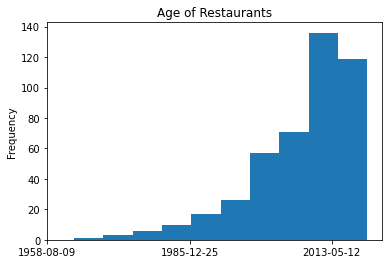

In [10]:
matched_randb["BusinessStartDate"] = pd.to_datetime(matched_randb["BusinessStartDate"]) #convert to datetime objects
matched_randb['ordinal'] = [x.toordinal() for x in matched_randb.BusinessStartDate] #convert the datetime to ordinals for graphing purposes
ax = matched_randb['ordinal'].plot(kind='hist')
x_ticks = ax.get_xticks() #creates the x axis
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]] #converts from ordinal to a datetime
ax.set_xticklabels(xlabels)
plt.title("Age of Restaurants") 
mean_age = matched_randb['ordinal'].mean() #find the mean as an ordinal
print("The mean restaurant start date is " + str(datetime.datetime.fromordinal(int(mean_age)))) #print an convert to a datetime

Next, we want to see the number of restaurants by zipcode in our matched dataset.

70130    25.336323
70115    13.452915
70116    12.331839
70119     9.417040
70118     8.520179
70122     5.605381
70117     5.381166
70112     5.156951
70124     3.587444
70113     2.017937
70125     1.793722
70127     1.793722
70126     1.569507
70128     1.569507
70129     0.896861
70114     0.896861
70131     0.672646
Name: Zip, dtype: float64

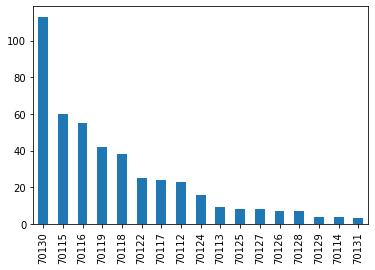

In [11]:
#The following lines clean up the dataframe by removing 10 digit area codes and by converting the type of the rows
matched_randb = matched_randb.replace("70116-2605","70116")
matched_randb = matched_randb.replace("70119-4709","70116")
matched_randb = matched_randb.replace("70130-2501","70116")
matched_randb = matched_randb.replace("70115-4036","70116")
matched_randb = matched_randb.replace('70117-7727', "70117")
matched_randb['Zip'] = matched_randb['Zip'].astype(int)
matched_randb.fillna(0)

matched_randb['Zip'].value_counts().plot.bar()
matched_randb['Zip'].value_counts()/4.46 #divide by the total to see percentages

#### Chain restaurant info

One category of restaurants we are interested in are national chains. First, we will generate graphs and summary statistics 
based on this information. Then, we will compare the number of chains in the 2019 yellowpages to the number of chains in our matched dataset.

In [12]:
chain_List = ["Baskin Robbins", "Buffalo Wild Wings", "Burger King", "Chipotle Mexican Grill", "Church’s Chicken", "Arby’s Roast Beef", 
              "Checkers", "Checkers Drive In Restaurants", "Cheesecake Factory", "Chick Fil A", "Dairy Queen", "Dunkin Donuts", "Five Guys Burgers",
              "Golden Corral", "Golden Wall", "Hardee’s", "Hooter’s", "IHOP", "Jimmy Johns", "McDonalds", "P F Changs China Bistro",
              "Panera Bread", "Papa Johns", "Little Caesar’s Pizza", "Pizza Hut", "Popeyes", "Raising Canes", "Rally’s", "Smoothie King",
              "Sonic Drive In", "Subway", "Waffle House", "Taco Bell"] #list of chains in 2019 restaurants
chain_List = [x.lower() for x in chain_List] #makes all entries lowercase
match = [] #blank list where a boolean will be stored
match_name = [] #blank list where chain name will be stored
for i in range(matched_randb["BusinessName"].count()):
    best_match = 0 #stores best match ratio
    row = matched_randb.iloc[i] 
    best_name = "" #stores best chain match
    for j in chain_List:
        name_ratio = fuzz.ratio(row["BusinessName"], j) #calculates ratio
        if name_ratio >=  best_match: #updates if the ratio is high enough
           best_name = j
           best_match = name_ratio
    if best_match >= 80: #stores the info if there is a match
       match.append(True)
       match_name.append(best_name)
    else:
       match.append(False)
       match_name.append("None")
        
matched_randb["Chain"] = match #adds boolean column to dataframe
matched_randb["Chain_name"] = match_name #adds chain name column to dataframe
matched_randb

,BusinessName,BusinessType,BusinessStartDate,Address,Zip,PhoneNumber,Location,ordinal,Chain,Chain_name
0,august moon,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2014-07-31,3635 prytania st,70115,0,"(29.9259100873785, -90.0943128381647)",735445,False,None
1,averys po boys,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2012-03-13,2510 tulane ave,70119,0,"(29.9605465348191, -90.0882987989543)",734575,False,None
2,avo,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2015-05-22,5908 magazine st,70115,0,0,735740,False,None
3,burritos grille,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2011-01-28,7009 read blvd,70127,261-8437,"(30.0387390655712, -89.9769793863906)",734165,False,None
4,ba chi canteen,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2013-04-01,7900 maple st,70118,373-5628,"(29.9432121335017, -90.1313377803855)",734959,False,None
5,ba mien restaurant,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2001-11-15,13235 chef menteur hwy,70129,255-0500,"(30.0322307373142, -89.9291300386407)",730804,False,None
6,barracuda,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2018-07-10,3984 tchoupitoulas st,70115,0,"(29.9174182863887, -90.0962195741506)",736885,False,None
7,baru bistro & tapas,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2007-05-01,3700 magazine st,70115,895-2225,"(29.9215521562826, -90.0933310406056)",732797,False,None
8,basin seafood & spirits,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2012-12-27,3222 magazine st,70115,0,"(29.9235852786801, -90.0869447325254)",734864,False,None
9,beachbum berry's latitude 29,1105 - FULL SVC RESTAURANTS (TABLE SERVICE),2014-11-06,320 decatur st,70130,0,"(29.9539276166384, -90.0652059852819)",735543,False,None


Now that we know this information, we can produce some graphs and statistics with our dataframe of chain statistics. First, lets find the average age of chain restaurants in New Orleans.

The mean restaurant start date is 2010-10-22 00:00:00


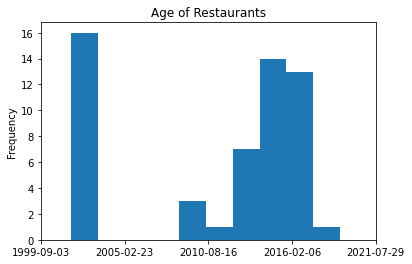

In [13]:
ax = matched_randb.loc[matched_randb["Chain"] == True, 'ordinal'].plot(kind='hist')
x_ticks = ax.get_xticks() #creates the x axis
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]] #converts from ordinal to a datetime
ax.set_xticklabels(xlabels)
plt.title("Age of Restaurants") 
mean_age = matched_randb.loc[matched_randb["Chain"] == True,'ordinal'].mean() #find the mean as an ordinal
print("The mean restaurant start date is " + str(datetime.datetime.fromordinal(int(mean_age)))) #print an convert to a datetime

As we can see, the chain restaurants are 3 years younger than the non-chain restaurants on average. Now, lets look at the chains by zipcode. In our final project, we willl compare this info to the average income info to see where chains are in New Orleans.

70130    0.327273
70122    0.272727
70115    0.072727
70131    0.054545
70114    0.054545
70128    0.036364
70118    0.036364
70117    0.036364
70112    0.036364
70127    0.018182
70126    0.018182
70119    0.018182
70113    0.018182
Name: Zip, dtype: float64

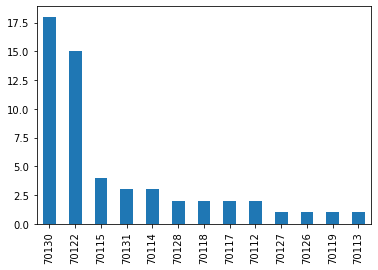

In [14]:
matched_randb.loc[matched_randb["Chain"] == True,'Zip'].value_counts().plot.bar()
matched_randb.loc[matched_randb["Chain"] == True, 'Zip'].value_counts()/55 #divide by the total to see percentages

As we can see, there are notable differences in the distributions of restaurants and the distributions of chains. 
For the final tutorial, we will store these variables in a map of New Orleans. Finally, for this milestone, we can look to see what chains in New Orleans are the most popular in our matched dataset.

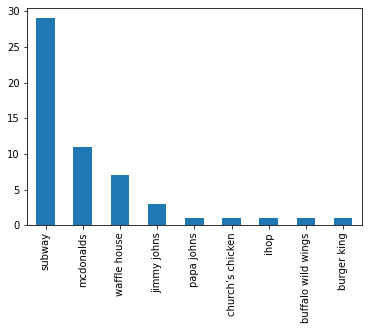

In [15]:
matched_randb.loc[matched_randb["Chain"] == True,'Chain_name'].value_counts().plot.bar()